In [11]:
%pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


# Experiment 2
Greenfield town is seeing rapid real estate development. A real estate company wants to predict ouse prices based solely on the size of the house (in sq ft) they have collected data from 2 recently sold houses.

| Size (sqft) | Price ($) |
|-------------|-----------|
| 1200        | 300000    |
| 1500        | 320000    |
| 2000        | 450000    |
| 1800        | 400000    |
| 2500        | 550000    |
| 3000        | 600000    |
| 2200        | 480000    |
| 2700        | 700000    |


In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Data
sizes = np.array([1200,1500,2000,1800,2500,3000,2200,2700])
prices = np.array([300000,320000,450000,400000,550000,600000,480000,700000])

# Means
x_mean = sizes.mean()
y_mean = prices.mean()

# Compute slope m manually
numerator = np.sum((sizes - x_mean) * (prices - y_mean))
denominator = np.sum((sizes - x_mean)**2)
m = numerator / denominator

# Compute intercept b manually
b = y_mean - m * x_mean

# Predictions
y_pred = m * sizes + b

print(f"Slope (Coefficient): {m:.2f}")
print(f"Intercept: {b:.2f}")


Slope (Coefficient): 212.17
Intercept: 26789.65


In [13]:
import numpy as np

# Data
sizes = np.array([1200,1500,2000,1800,2500,3000,2200,2700])
prices = np.array([300000,320000,450000,400000,550000,600000,480000,700000])

# Construct X matrix with a column of 1s
X = np.column_stack((np.ones(len(sizes)), sizes))

# y vector
y = prices.reshape(-1, 1)

# Closed-form solution θ = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

theta0 = theta[0, 0]   # intercept
theta1 = theta[1, 0]   # slope

print(f"Theta0 (Intercept): {theta0:.2f}")
print(f"Theta1 (Slope): {theta1:.2f}")


Theta0 (Intercept): 26789.65
Theta1 (Slope): 212.17


In [14]:
xpred = 1940
y_pred = m * xpred + b
print(f"Predicted price for size {xpred} sqft: {y_pred:.2f}")


Predicted price for size 1940 sqft: 438400.57


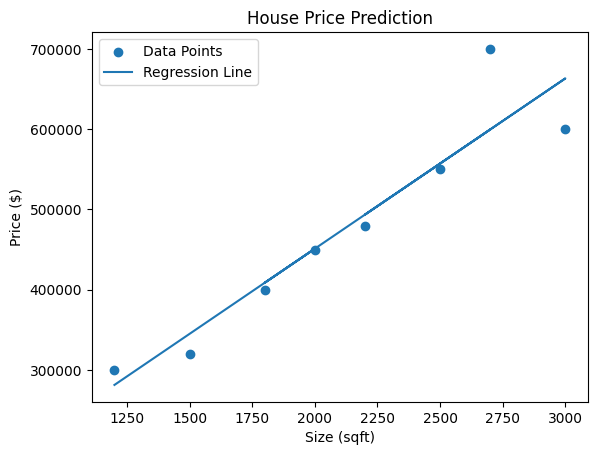

In [15]:
y_line = m * sizes + b

plt.scatter(sizes, prices, label='Data Points')
plt.plot(sizes, y_line, label='Regression Line')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')
plt.title('House Price Prediction')
plt.legend()
plt.show()


# Experiment 2.2

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

data=pd.read_csv('../assets/Salary_data.csv')

In [17]:
data.head(5) 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare X and y
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Get slope and intercept
m = model.coef_[0]
b = model.intercept_

print(f"Slope (Coefficient): {m:.2f}")
print(f"Intercept: {b:.2f}")


Slope (Coefficient): 9423.82
Intercept: 25321.58


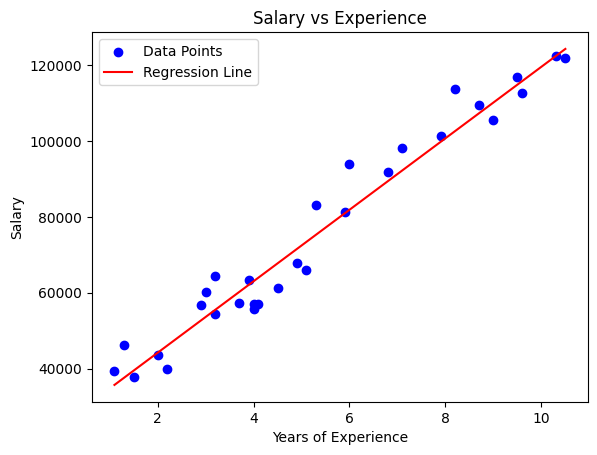

In [19]:
y_line = model.predict(X)  # prediction for the full dataset

plt.scatter(data['YearsExperience'], data['Salary'], color='blue', label='Data Points')
plt.plot(data['YearsExperience'], y_line, color='red', label='Regression Line')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.legend()
plt.show()


In [ ]:
# Predict test values
y_pred = model.predict(X_test)
print(y_pred)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


In [ ]:
# Calcualte R^2 score
r2_score = model.score(X_test, y_test)
print(f"R^2 Score: {r2_score:.4f}")


R^2 Score: 0.9024


In [27]:
import pickle
filename = 'experiment2-2.sav'
pickle.dump(model, open(filename, 'wb'))


In [28]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
result=loaded_model.predict([[15]])
result